<a href="https://colab.research.google.com/github/SantiagoGomezfpv/hyperparameter/blob/main/CargarPickles_perRow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Base para pruebas RZ

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd '/content/drive/MyDrive/JOVEN INVESTIGADOR/Data'

/content/drive/MyDrive/JOVEN INVESTIGADOR/Data


In [4]:
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE:", DEVICE)

DEVICE: cpu


In [5]:

import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split

## Índices Acústicos

Generados con scikit-maad, basado en https://scikit-maad.github.io/_auto_examples/2_advanced/plot_extract_alpha_indices.html#sphx-glr-auto-examples-2-advanced-plot-extract-alpha-indices-py

In [6]:
with open('./ais_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_ai = unserialized_data['X']
    y_ai = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [7]:
sum(sum(np.isnan(X_ai)))

481

In [8]:
X_ai[np.isnan(X_ai)] = 0

In [9]:
sum(sum(np.isnan(X_ai)))

0

In [10]:
print(f'Tamaño matriz de características: {X_ai.shape}')
print(f'Tamaño vector de etiquetas: {y_ai.shape}')

Tamaño matriz de características: (71497, 60)
Tamaño vector de etiquetas: (71497, 1)


## VGGish

S. Hershey et al., ‘CNN Architectures for Large-Scale Audio Classification’,\ in International Conference on Acoustics, Speech and Signal Processing (ICASSP),2017\ Available: https://arxiv.org/abs/1609.09430, https://ai.google/research/pubs/pub45611

Modelo preentrenado usado: https://github.com/harritaylor/torchvggish

In [11]:
with open('./vgg_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_vgg = unserialized_data['X']
    y_vgg = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [12]:
print(f'Tamaño matriz de características: {X_vgg.shape}')
print(f'Tamaño vector de etiquetas: {y_vgg.shape}')

Tamaño matriz de características: (71497, 128)
Tamaño vector de etiquetas: (71497, 1)


## YAMNet

https://www.diva-portal.org/smash/get/diva2:1605037/FULLTEXT01.pdf

Modelo preentrenado usado: https://tfhub.dev/google/yamnet/1

In [13]:
with open('./yamn_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_yamn = unserialized_data['X']
    y_yamn = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [14]:
print(f'Tamaño matriz de características: {X_yamn.shape}')
print(f'Tamaño vector de etiquetas: {y_yamn.shape}')

Tamaño matriz de características: (71497, 1024)
Tamaño vector de etiquetas: (71497, 1)


## PANNs

Kong, Qiuqiang, Yin Cao, Turab Iqbal, Yuxuan Wang, Wenwu Wang, and Mark D. Plumbley. "PANNs: Large-Scale Pretrained Audio Neural Networks for Audio Pattern Recognition." arXiv preprint arXiv:1912.10211 (2019).

Modelo preentrenado usado https://github.com/qiuqiangkong/panns_inference

In [15]:
with open('./panns_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_panns = unserialized_data['X']
    y_panns = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [16]:
print(f'Tamaño matriz de características: {X_panns.shape}')
print(f'Tamaño vector de etiquetas: {y_panns.shape}')

Tamaño matriz de características: (71497, 2048)
Tamaño vector de etiquetas: (71497, 1)


In [17]:
print(np.unique(y_vgg, return_counts=True)) # Las etiquetas son 0, 1 y 2. Hacen referencia a lo siguiente:
NumtoCover = {0: 'Pastizal', 1:'Sabana', 2:'Bosque'}


(array([0., 1., 2.]), array([41957, 14994, 14546]))


## Celda para división de datos en Entrenamiento/Validación/Prueba (Train/val/test)

La siguiente celda se hace con la intención de dividir el conjunto de índices acústicos (_ai) en conjuntos de entrenamiento, validación y prueba con una proporción 80%/10%/10%.

Adicionalmente se almacenan los índices con los que se realizó la división, esto con el fin de realizar exactamente la misma separación con las características VGGish, PANNs y YAMNet. Lo anterior para garantizar que se están trabajando con las mismas grabaciones sin importar la caracterización.

Las etiquetas son las mismas para todos los conjuntos de datos.

In [18]:
n_samples = X_ai.shape[0]
indices = np.arange(n_samples)

X_ai_train, X_ai_test, y_train, y_test, idx_train, idx_test = train_test_split(X_ai, y_ai, indices, test_size=0.2)
X_ai_val, X_ai_test, y_val, y_test, idx_val, idx_test = train_test_split(X_ai_test, y_test, idx_test, test_size=0.5)

In [19]:
print(X_ai_train.shape)
print(X_ai_val.shape)
print(X_ai_test.shape)

(57197, 60)
(7150, 60)
(7150, 60)


In [20]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_ai.shape)

(57197, 1)
(7150, 1)
(7150, 1)
(71497, 1)


### VGGish

In [21]:
X_vgg_train = X_vgg[idx_train]
X_vgg_val = X_vgg[idx_val]
X_vgg_test = X_vgg[idx_test]

In [22]:
print(X_vgg_train.shape)
print(X_vgg_val.shape)
print(X_vgg_test.shape)

(57197, 128)
(7150, 128)
(7150, 128)


### YAMNet

In [23]:
X_yamn_train = X_yamn[idx_train]
X_yamn_val = X_yamn[idx_val]
X_yamn_test = X_yamn[idx_test]

In [24]:
print(X_yamn_train.shape)
print(X_yamn_val.shape)
print(X_yamn_test.shape)

(57197, 1024)
(7150, 1024)
(7150, 1024)


### PANNs

In [25]:
  X_panns_train = X_panns[idx_train]
  X_panns_val = X_panns[idx_val]
  X_panns_test = X_panns[idx_test]

In [26]:
print(X_panns_train.shape)
print(X_panns_val.shape)
print(X_panns_test.shape)

(57197, 2048)
(7150, 2048)
(7150, 2048)


## Técnicas tradicionales clasificadores

In [27]:
!pip install optuna scikit-learn xgboost matplotlib seaborn

In [28]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.svm import SVC

# Asegúrate de que y_train, y_val y y_test sean vectores 1D
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

## Indices acústicos (_ai)


*   X_ai_train
*   X_ai_val
*   X_ai_test






### Random Forest + Optuna

[I 2024-06-15 14:29:41,698] A new study created in memory with name: no-name-3970d160-c8ab-4af7-a5d3-3d487118d0be
[I 2024-06-15 14:30:00,591] Trial 0 finished with value: 0.7822377622377622 and parameters: {'n_estimators': 19, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7822377622377622.
[I 2024-06-15 14:30:07,518] Trial 1 finished with value: 0.7811188811188812 and parameters: {'n_estimators': 10, 'max_depth': 31, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7822377622377622.
[I 2024-06-15 14:30:16,198] Trial 2 finished with value: 0.7731468531468532 and parameters: {'n_estimators': 21, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7822377622377622.
[I 2024-06-15 14:30:28,616] Trial 3 finished with value: 0.7655944055944056 and parameters: {'n_estimators': 28, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      4200
         1.0       0.82      0.62      0.71      1521
         2.0       0.77      0.64      0.70      1429

    accuracy                           0.82      7150
   macro avg       0.81      0.74      0.76      7150
weighted avg       0.82      0.82      0.81      7150



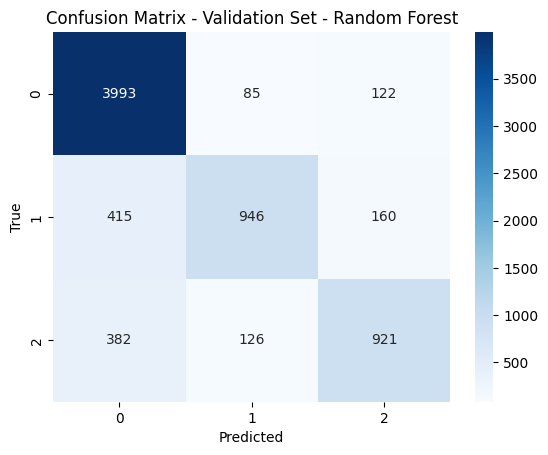

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      4251
         1.0       0.80      0.61      0.69      1430
         2.0       0.77      0.63      0.70      1469

    accuracy                           0.82      7150
   macro avg       0.80      0.73      0.76      7150
weighted avg       0.81      0.82      0.81      7150



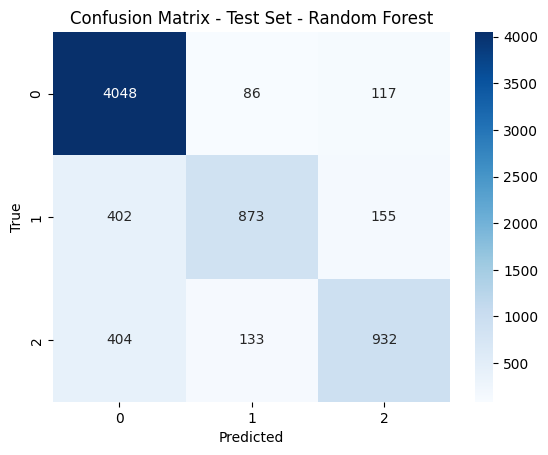

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(X_ai_train, y_train)
    y_pred = rf.predict(X_ai_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_ai_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(X_ai_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(X_ai_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 186, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-15 15:56:19,075] A new study created in memory with name: no-name-2374c550-87d1-4dcb-a622-97ed6663d193
[I 2024-06-15 15:57:16,129] Trial 0 finished with value: 0.6587412587412588 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.6587412587412588.
[I 2024-06-15 15:57:20,039] Trial 1 finished with value: 0.647972027972028 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6587412587412588.
[I 2024-06-15 15:57:24,536] Trial 2 finished with value: 0.6482517482517482 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6587412587412588.
[I 2024-06-15 15:57:29,864] Trial 3 finished with value: 0.647972027972028 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6587412587412588.
[I 2024-06-15 15:58:05,784] Trial 4 finished with value: 0.664

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79      4204
         1.0       0.52      0.32      0.40      1453
         2.0       0.57      0.33      0.42      1493

    accuracy                           0.66      7150
   macro avg       0.60      0.52      0.54      7150
weighted avg       0.64      0.66      0.63      7150



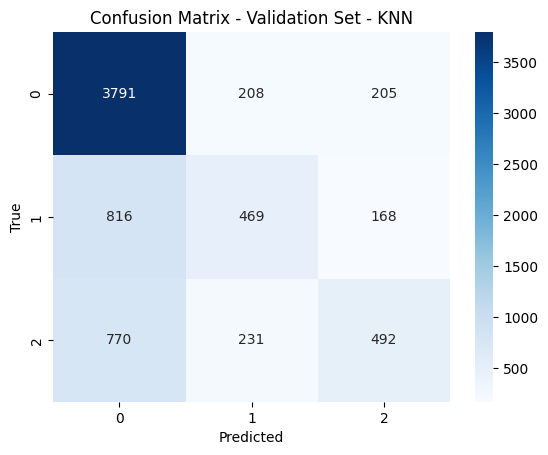

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79      4194
         1.0       0.50      0.31      0.38      1466
         2.0       0.52      0.30      0.38      1490

    accuracy                           0.65      7150
   macro avg       0.57      0.50      0.52      7150
weighted avg       0.62      0.65      0.62      7150



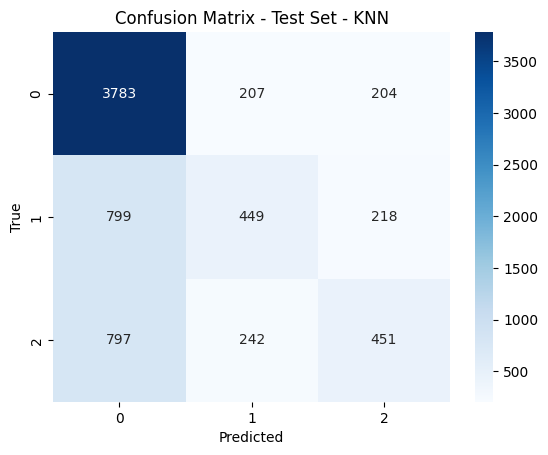

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_ai_train, y_train)
    y_pred = knn.predict(X_ai_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_ai_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(X_ai_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(X_ai_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 19, 'weights': 'distance', 'metric': 'manhattan'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(X_ai_train, y_train)
    y_pred = svm.predict(X_ai_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(X_ai_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(X_ai_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(X_ai_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-18 02:03:12,116] A new study created in memory with name: no-name-15cc04b6-23a4-4fdb-a28f-765a6ad335af


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

[I 2024-06-16 00:21:04,706] A new study created in memory with name: no-name-df7bb27c-8aa0-440a-b3ca-5ee13bfda5d3
[I 2024-06-16 00:22:02,185] Trial 0 finished with value: 0.8518881118881119 and parameters: {'n_estimators': 126, 'learning_rate': 0.10526364977985457, 'max_depth': 10, 'subsample': 0.7079774979303071, 'colsample_bytree': 0.804350135732862}. Best is trial 0 with value: 0.8518881118881119.
[I 2024-06-16 00:27:17,604] Trial 1 finished with value: 0.8386013986013986 and parameters: {'n_estimators': 72, 'learning_rate': 0.014343248761214854, 'max_depth': 26, 'subsample': 0.9355986936597753, 'colsample_bytree': 0.801446479838232}. Best is trial 0 with value: 0.8518881118881119.
[I 2024-06-16 00:29:18,715] Trial 2 finished with value: 0.8518881118881119 and parameters: {'n_estimators': 41, 'learning_rate': 0.18191526366393126, 'max_depth': 24, 'subsample': 0.9958034217933147, 'colsample_bytree': 0.7466832648346481}. Best is trial 0 with value: 0.8518881118881119.
[I 2024-06-16 00

Validation Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4174
         1.0       0.85      0.75      0.79      1478
         2.0       0.83      0.78      0.80      1498

    accuracy                           0.87      7150
   macro avg       0.86      0.83      0.84      7150
weighted avg       0.87      0.87      0.87      7150



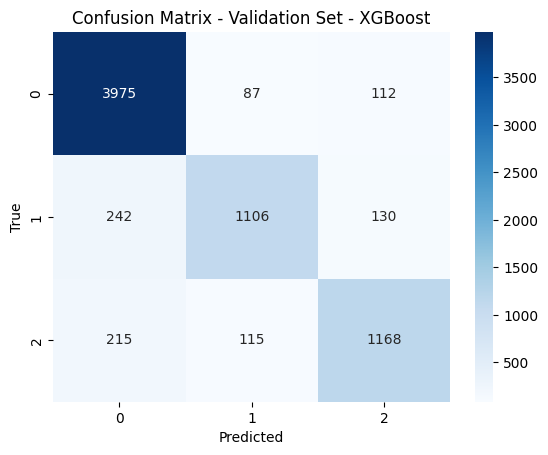

Test Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      4243
         1.0       0.85      0.75      0.80      1437
         2.0       0.82      0.78      0.80      1470

    accuracy                           0.88      7150
   macro avg       0.86      0.83      0.84      7150
weighted avg       0.88      0.88      0.88      7150



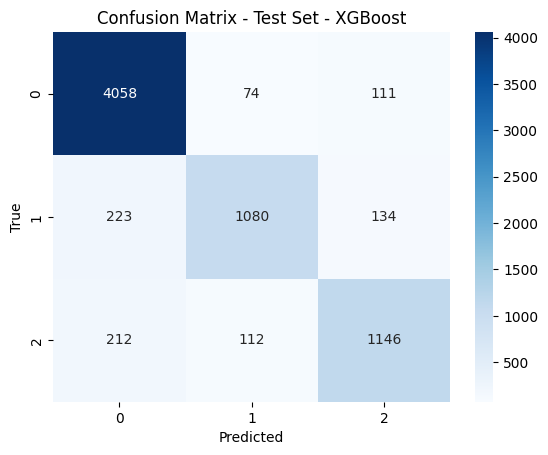

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(X_ai_train, y_train)
    y_pred = xgb_clf.predict(X_ai_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(X_ai_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(X_ai_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(X_ai_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

{'n_estimators': 183, 'learning_rate': 0.15452798937747395, 'max_depth': 13, 'subsample': 0.8195529931805385, 'colsample_bytree': 0.9597134242449049}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## VGGish



*   X_vgg_train
*   X_vgg_val
*   X_vgg_test

### Random Forest + Optuna

[I 2024-06-15 00:15:46,842] A new study created in memory with name: no-name-69d86dab-50d8-45de-bb6a-073d2e695e4b
[I 2024-06-15 00:16:42,184] Trial 0 finished with value: 0.7704895104895105 and parameters: {'n_estimators': 64, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7704895104895105.
[I 2024-06-15 00:18:26,185] Trial 1 finished with value: 0.7818181818181819 and parameters: {'n_estimators': 80, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7818181818181819.
[I 2024-06-15 00:19:48,092] Trial 2 finished with value: 0.7765034965034965 and parameters: {'n_estimators': 82, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7818181818181819.
[I 2024-06-15 00:21:02,014] Trial 3 finished with value: 0.7827972027972028 and parameters: {'n_estimators': 69, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4187
         1.0       0.75      0.54      0.63      1494
         2.0       0.73      0.59      0.65      1469

    accuracy                           0.79      7150
   macro avg       0.77      0.70      0.72      7150
weighted avg       0.79      0.79      0.78      7150



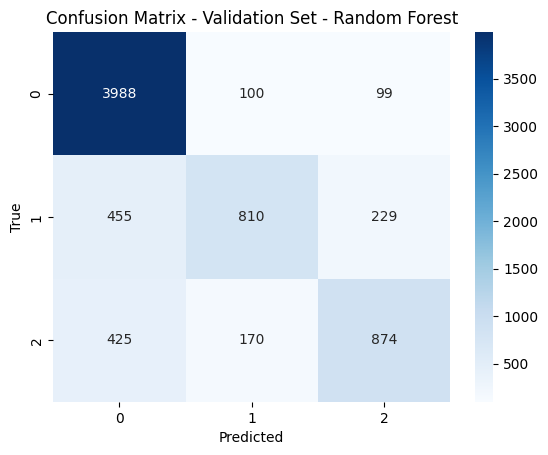

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4169
         1.0       0.76      0.56      0.64      1503
         2.0       0.74      0.61      0.67      1478

    accuracy                           0.80      7150
   macro avg       0.77      0.71      0.73      7150
weighted avg       0.79      0.80      0.79      7150



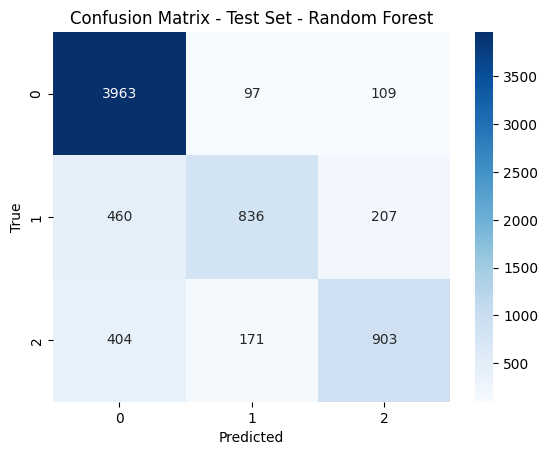

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(X_vgg_train, y_train)
    y_pred = rf.predict(X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(X_vgg_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(X_vgg_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 164, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 2}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-15 01:45:32,067] A new study created in memory with name: no-name-ef856f5a-33c9-43a6-9f60-f00bc25792ad
[I 2024-06-15 01:45:37,982] Trial 0 finished with value: 0.7946853146853147 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.7946853146853147.
[I 2024-06-15 01:45:45,904] Trial 1 finished with value: 0.7987412587412588 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 1 with value: 0.7987412587412588.
[I 2024-06-15 01:45:51,854] Trial 2 finished with value: 0.7861538461538462 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7987412587412588.
[I 2024-06-15 01:47:19,850] Trial 3 finished with value: 0.8146853146853147 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 3 with value: 0.8146853146853147.
[I 2024-06-15 01:48:47,061] Trial 4 finished with value: 0.8

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4187
         1.0       0.72      0.68      0.70      1494
         2.0       0.73      0.66      0.69      1469

    accuracy                           0.82      7150
   macro avg       0.77      0.75      0.76      7150
weighted avg       0.81      0.82      0.82      7150



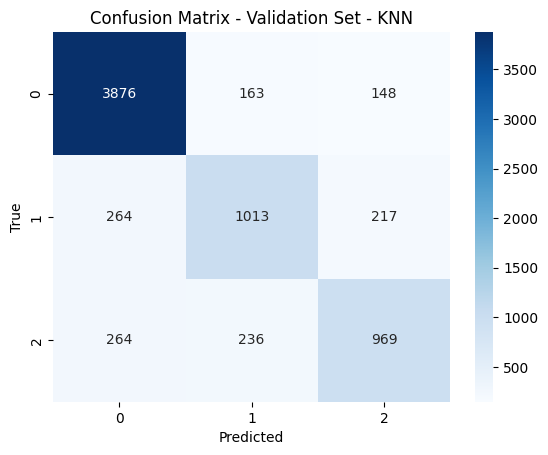

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4169
         1.0       0.71      0.67      0.69      1503
         2.0       0.72      0.66      0.69      1478

    accuracy                           0.81      7150
   macro avg       0.77      0.75      0.76      7150
weighted avg       0.81      0.81      0.81      7150



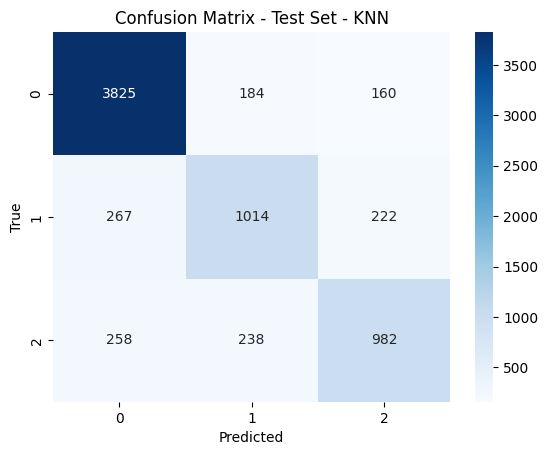

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_vgg_train, y_train)
    y_pred = knn.predict(X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(X_vgg_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(X_vgg_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(X_ai_train, y_train)
    y_pred = svm.predict(X_ai_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(X_ai_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(X_ai_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(X_ai_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

NameError: name 'best_svm_params' is not defined

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

[I 2024-06-16 15:46:29,856] A new study created in memory with name: no-name-705b9e56-0f2d-4418-9379-f5f8ac18be16
[I 2024-06-16 15:54:12,451] Trial 0 finished with value: 0.8372027972027972 and parameters: {'n_estimators': 170, 'learning_rate': 0.0970230823087021, 'max_depth': 17, 'subsample': 0.8777157144371448, 'colsample_bytree': 0.8698497762854757}. Best is trial 0 with value: 0.8372027972027972.
[I 2024-06-16 15:59:51,107] Trial 1 finished with value: 0.8369230769230769 and parameters: {'n_estimators': 174, 'learning_rate': 0.179445718523186, 'max_depth': 26, 'subsample': 0.9505431529386126, 'colsample_bytree': 0.7689392978108472}. Best is trial 0 with value: 0.8372027972027972.
[I 2024-06-16 16:05:07,860] Trial 2 finished with value: 0.840979020979021 and parameters: {'n_estimators': 167, 'learning_rate': 0.19078872263560687, 'max_depth': 24, 'subsample': 0.8372638285845444, 'colsample_bytree': 0.8106097533641962}. Best is trial 2 with value: 0.840979020979021.
[I 2024-06-16 16:1

Validation Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      4202
         1.0       0.79      0.68      0.73      1532
         2.0       0.75      0.69      0.72      1416

    accuracy                           0.84      7150
   macro avg       0.81      0.77      0.79      7150
weighted avg       0.84      0.84      0.84      7150



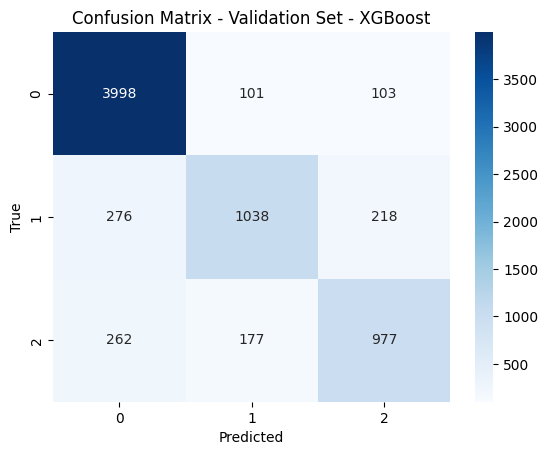

Test Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      4245
         1.0       0.78      0.67      0.72      1439
         2.0       0.75      0.69      0.72      1466

    accuracy                           0.84      7150
   macro avg       0.81      0.77      0.79      7150
weighted avg       0.84      0.84      0.84      7150



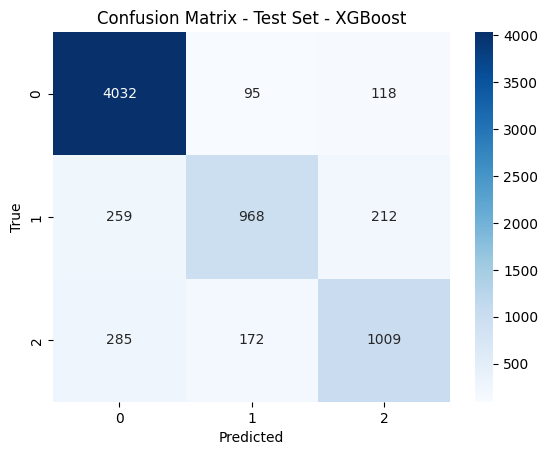

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(X_vgg_train, y_train)
    y_pred = xgb_clf.predict(X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(X_vgg_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(X_vgg_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

{'n_estimators': 167, 'learning_rate': 0.19078872263560687, 'max_depth': 24, 'subsample': 0.8372638285845444, 'colsample_bytree': 0.8106097533641962}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## YAMNet



*   X_yamn_train
*   X_yamn_val
*   X_yamn_test

### Random Forest + Optuna

[I 2024-06-16 20:24:29,856] A new study created in memory with name: no-name-739a38ae-e0d8-455a-bc5c-ec3fcf6a47e4
[I 2024-06-16 20:24:41,544] Trial 0 finished with value: 0.6246153846153846 and parameters: {'n_estimators': 20, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.6246153846153846.
[I 2024-06-16 20:25:25,164] Trial 1 finished with value: 0.7507692307692307 and parameters: {'n_estimators': 22, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.7507692307692307.
[I 2024-06-16 20:26:19,930] Trial 2 finished with value: 0.7538461538461538 and parameters: {'n_estimators': 64, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7538461538461538.
[I 2024-06-16 20:27:40,184] Trial 3 finished with value: 0.7632167832167832 and parameters: {'n_estimators': 83, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      4202
         1.0       0.75      0.50      0.60      1532
         2.0       0.70      0.55      0.61      1416

    accuracy                           0.78      7150
   macro avg       0.75      0.67      0.69      7150
weighted avg       0.77      0.78      0.76      7150



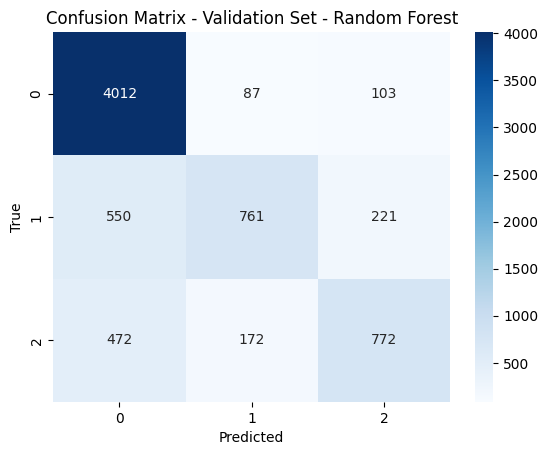

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      4245
         1.0       0.74      0.53      0.62      1439
         2.0       0.71      0.53      0.61      1466

    accuracy                           0.78      7150
   macro avg       0.75      0.67      0.70      7150
weighted avg       0.77      0.78      0.77      7150



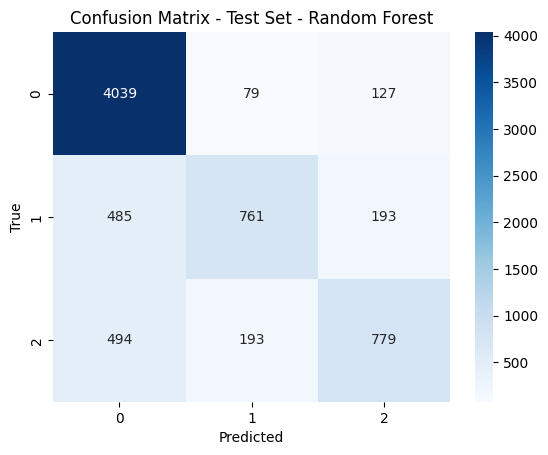

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(X_yamn_train, y_train)
    y_pred = rf.predict(X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(X_yamn_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(X_yamn_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 172, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-16 21:50:50,956] A new study created in memory with name: no-name-c8d74411-3dad-4756-9c6d-c325ba2d43ef
[I 2024-06-16 21:51:26,068] Trial 0 finished with value: 0.7900699300699301 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.7900699300699301.
[I 2024-06-16 21:59:51,265] Trial 1 finished with value: 0.8116083916083916 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.8116083916083916.
[I 2024-06-16 22:07:50,280] Trial 2 finished with value: 0.8131468531468532 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 2 with value: 0.8131468531468532.
[I 2024-06-16 22:08:27,432] Trial 3 finished with value: 0.7777622377622377 and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 2 with value: 0.8131468531468532.
[I 2024-06-16 22:16:23,993] Trial 4 finished with value: 0.797

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4202
         1.0       0.73      0.69      0.71      1532
         2.0       0.72      0.66      0.69      1416

    accuracy                           0.82      7150
   macro avg       0.77      0.76      0.77      7150
weighted avg       0.81      0.82      0.82      7150



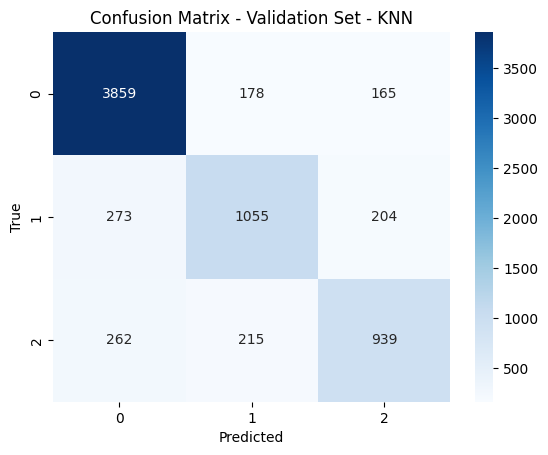

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      4245
         1.0       0.72      0.71      0.71      1439
         2.0       0.73      0.67      0.70      1466

    accuracy                           0.82      7150
   macro avg       0.78      0.76      0.77      7150
weighted avg       0.82      0.82      0.82      7150



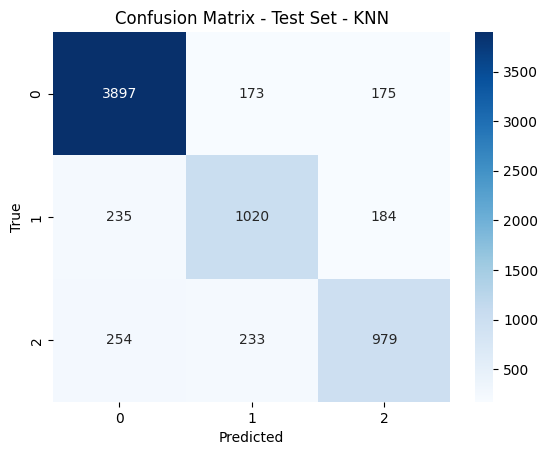

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_yamn_train, y_train)
    y_pred = knn.predict(X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(X_yamn_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(X_yamn_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(X_yamn_train, y_train)
    y_pred = svm.predict(X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(X_yamn_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(X_yamn_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(X_yamn_train, y_train)
    y_pred = xgb_clf.predict(X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(X_yamn_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(X_yamn_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-17 01:19:17,133] A new study created in memory with name: no-name-9b0750a4-71f7-4a33-9fd1-1c92f0f73aaa


In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## PANNs



*   X_panns_train
*   X_panns_val
*   X_panns_test

### Random Forest + Optuna

[I 2024-06-17 15:56:56,489] A new study created in memory with name: no-name-867c24e0-6fb5-4ef5-b895-7c44134e5f87
[I 2024-06-17 15:59:25,336] Trial 0 finished with value: 0.6746853146853147 and parameters: {'n_estimators': 182, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6746853146853147.
[I 2024-06-17 16:02:53,925] Trial 1 finished with value: 0.7953846153846154 and parameters: {'n_estimators': 194, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.7953846153846154.
[I 2024-06-17 16:03:20,851] Trial 2 finished with value: 0.7676923076923077 and parameters: {'n_estimators': 39, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.7953846153846154.
[I 2024-06-17 16:03:30,973] Trial 3 finished with value: 0.7068531468531468 and parameters: {'n_estimators': 21, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4122
         1.0       0.85      0.62      0.72      1538
         2.0       0.82      0.64      0.72      1490

    accuracy                           0.83      7150
   macro avg       0.83      0.74      0.78      7150
weighted avg       0.83      0.83      0.82      7150



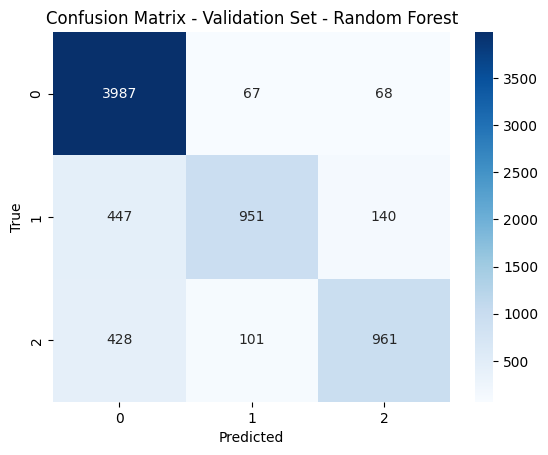

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      4232
         1.0       0.83      0.61      0.70      1476
         2.0       0.82      0.65      0.73      1442

    accuracy                           0.83      7150
   macro avg       0.83      0.74      0.77      7150
weighted avg       0.83      0.83      0.82      7150



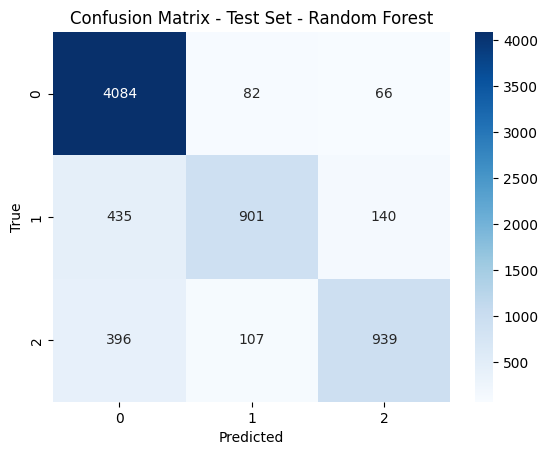

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(X_panns_train, y_train)
    y_pred = rf.predict(X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(X_panns_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(X_panns_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 171, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-17 18:28:42,913] A new study created in memory with name: no-name-bd8179bf-ed26-4346-92d9-f4fe6ee14ee7
[I 2024-06-17 18:30:07,179] Trial 0 finished with value: 0.9082517482517483 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9082517482517483.
[I 2024-06-17 18:31:20,691] Trial 1 finished with value: 0.8847552447552448 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9082517482517483.
[I 2024-06-17 18:32:32,792] Trial 2 finished with value: 0.8981818181818182 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.9082517482517483.
[I 2024-06-17 18:55:59,631] Trial 3 finished with value: 0.8944055944055944 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.9082517482517483.
[I 2024-06-17 18:57:12,570] Trial 4 finished with value: 0.8

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4237
         1.0       0.87      0.83      0.85      1483
         2.0       0.85      0.84      0.85      1430

    accuracy                           0.91      7150
   macro avg       0.89      0.88      0.88      7150
weighted avg       0.91      0.91      0.91      7150



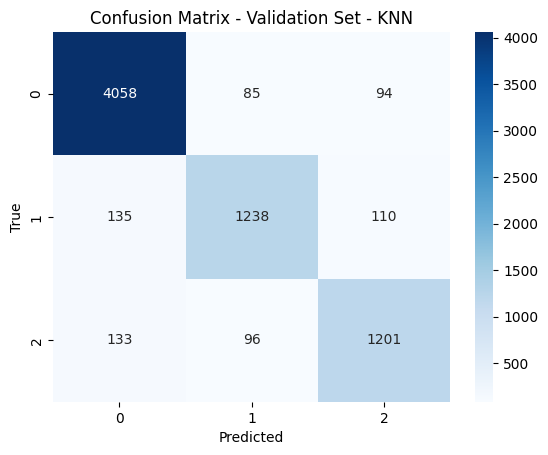

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4216
         1.0       0.86      0.83      0.85      1513
         2.0       0.88      0.84      0.86      1421

    accuracy                           0.91      7150
   macro avg       0.89      0.88      0.88      7150
weighted avg       0.91      0.91      0.91      7150



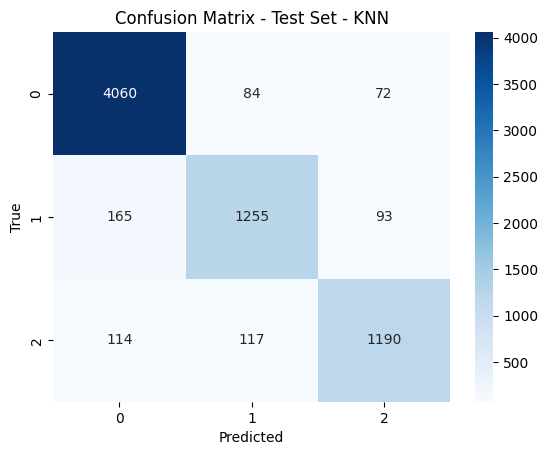

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(X_panns_train, y_train)
    y_pred = knn.predict(X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(X_panns_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(X_panns_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'minkowski'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(X_panns_train, y_train)
    y_pred = svm.predict(X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(X_panns_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(X_panns_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

In [1]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(X_panns_train, y_train)
    y_pred = xgb_clf.predict(X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(X_panns_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(X_panns_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'optuna' is not defined

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

# Prueba 1, no termina de ejecutar

In [ ]:
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

# Asegúrate de que y_train, y_val y y_test sean vectores 1D
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

datasets = {
    'Acoustic Indices': (X_ai_train, y_train),
    'VGGish': (X_vgg_train, y_train),
    'YAMNet': (X_yamn_train, y_train),
    'PANNs': (X_panns_train, y_train)
}

### **Random Forest + Optuna**

In [ ]:
def objective_rf(trial, X_train, y_train):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

[I 2024-06-14 00:02:01,494] A new study created in memory with name: no-name-b6ce5e22-4e49-4b8f-b366-59a64d521215
[I 2024-06-14 00:04:30,307] Trial 0 finished with value: 0.8004266112679366 and parameters: {'n_estimators': 132, 'max_depth': 25, 'min_samples_split': 5}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:04:49,085] Trial 1 finished with value: 0.6306100249241648 and parameters: {'n_estimators': 51, 'max_depth': 5, 'min_samples_split': 15}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:06:14,101] Trial 2 finished with value: 0.7347938105450768 and parameters: {'n_estimators': 117, 'max_depth': 11, 'min_samples_split': 9}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:07:06,002] Trial 3 finished with value: 0.661922829442051 and parameters: {'n_estimators': 96, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:09:58,264] Trial 4 finished with value: 0.784674043547452

### **K-nn + Optuna**

In [ ]:
def objective_knn(trial, X_train, y_train):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    clf = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

### **SVM + Optuna**

In [ ]:
def objective_svm(trial, X_train, y_train):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

### **XGBoost + Optuna**

In [ ]:
def objective_xgb(trial, X_train, y_train):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

    clf = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

## Optimizar y Obtener los Mejores Parámetros

In [ ]:
def optimize_and_train(dataset_name, X_train, y_train):
    print(f"Optimizing {dataset_name}...")

    study_rf = optuna.create_study(direction='maximize')
    study_rf.optimize(lambda trial: objective_rf(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for Random Forest ({dataset_name}): {study_rf.best_params}')

    study_knn = optuna.create_study(direction='maximize')
    study_knn.optimize(lambda trial: objective_knn(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for K-NN ({dataset_name}): {study_knn.best_params}')

    study_svm = optuna.create_study(direction='maximize')
    study_svm.optimize(lambda trial: objective_svm(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for SVM ({dataset_name}): {study_svm.best_params}')

    study_xgb = optuna.create_study(direction='minimize')
    study_xgb.optimize(lambda trial: objective_xgb(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for XGBoost ({dataset_name}): {study_xgb.best_params}')

    # Entrenar los modelos con los mejores parámetros
    best_rf = RandomForestClassifier(**study_rf.best_params)
    best_rf.fit(X_train, y_train)

    best_knn = KNeighborsClassifier(**study_knn.best_params)
    best_knn.fit(X_train, y_train)

    best_svm = SVC(**study_svm.best_params)
    best_svm.fit(X_train, y_train)

    best_xgb = xgb.XGBClassifier(**study_xgb.best_params)
    best_xgb.fit(X_train, y_train)

    return {
        'Random Forest': best_rf,
        'K-NN': best_knn,
        'SVM': best_svm,
        'XGBoost': best_xgb
    }

# Optimizar y entrenar modelos para cada conjunto de datos
models = {}
for dataset_name, (X_train, y_train) in datasets.items():
    models[dataset_name] = optimize_and_train(dataset_name, X_train, y_train)


## **Evaluar y Graficar los Resultados**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_models(models, X_val, y_val):
    for model_name, model in models.items():
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print(f'Accuracy for {model_name}: {accuracy}')
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Evaluar los modelos en el conjunto de validación
for dataset_name, (X_val, y_val) in {
    'Acoustic Indices': (X_ai_val, y_val),
    'VGGish': (X_vgg_val, y_val),
    'YAMNet': (X_yamn_val, y_val),
    'PANNs': (X_panns_val, y_val)
}.items():
    print(f"Evaluating models for {dataset_name}...")
    evaluate_models(models[dataset_name], X_val, y_val)